# Le Meilleur Data Scientist de France 2016


----
## Objectif
Mettre au point le meilleur modèle de Machine Learning pour estimer combien coûte une boite de médicaments.

Dans un premier temps :
- Etape 1 : Chargez le fichier CSV
- Etape 2 : Sélectionnez uniquement les variables `libelle` et `nb`
- Etape 3 : Séparez le jeu de données en X_train X_test et Y_train Y_test (20% test)
- Etape 4 : Lancez une régression linéaire
- Etape 5 : Donnez-moi votre score

### Import

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Métrique d'évaluation du modèle MAPE

Vous pouvez également utiliser la métrique MAPE dans scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Le Mean Absolute Percentage Error (MAPE) est une métrique fréquemment utilisée pour évaluer la précision des prédictions dans un modèle de régression. Il mesure l'exactitude en calculant le pourcentage moyen des erreurs absolues par rapport aux valeurs réelles. La formule du MAPE est la suivante :

$$ \text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$

où :
- ${ n }$ est le nombre total d'observations.
- ${ y_i }$ représente la valeur réelle de la i-ème observation.
- ${ \hat{y}_i }$ est la valeur prédite pour la i-ème observation.

Le MAPE offre une mesure facile à interpréter de l'erreur moyenne en pourcentage. Un MAPE faible suggère des prédictions précises, tandis qu'un MAPE élevé indique des erreurs significatives par rapport aux valeurs réelles. Il est important de noter que le MAPE peut être biaisé, notamment en présence de valeurs réelles proches de zéro, pouvant conduire à des erreurs infinies ou très élevées.

In [2]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Chargement des données

In [3]:
TARGET="prix"


## Partie 01 

----

## ETAPE 01 

## Import des données


In [33]:
# Importation de la bibliothèque pandas avec l'alias pd
import pandas as pd

# Lecture du fichier CSV "boites_medicaments.csv" avec comme délimiteur le point-virgule
df_medicaments = pd.read_csv("data/boites_medicaments.csv", delimiter=';')

# Affichage des quatre premières lignes du DataFrame pour une inspection initiale
df_medicaments.head(4)


,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,...,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,0,0,0,0,0,0,0,1,...,65%,comprimé pelliculé,orale,Autorisation active,2014,2014,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),DÉSOGESTREL,2.83
1,plaquette(s) thermoformée(s) aluminium de 28 c...,1,0,0,0,0,0,0,0,1,...,65%,comprimé à croquer,orale,Autorisation active,2013,2009,Procédure de reconnaissance mutuelle,TEVA SANTE,"MONTÉLUKAST ACIDE, MONTÉLUKAST SODIQUE",14.30
2,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,...,65%,gélule à libération prolongée,orale,Autorisation active,2000,1996,Procédure nationale,MYLAN SAS,CHLORHYDRATE DE DILTIAZEM,5.66
3,30 sachet(s)-dose(s) papier aluminium complexe...,0,0,0,0,0,0,0,1,0,...,65%,granulés à libération prolongée,orale,Autorisation active,2005,2004,Procédure nationale,SANOFI AVENTIS FRANCE,"ACIDE VALPROÏQUE, VALPROATE DE SODIUM",24.27


In [34]:
# Affichage des informations sur le DataFrame, y compris les types de données, les valeurs non nulles, et la mémoire utilisée
df_medicaments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   libelle            8564 non-null   object 
 1   libelle_plaquette  8564 non-null   int64  
 2   libelle_ampoule    8564 non-null   int64  
 3   libelle_flacon     8564 non-null   int64  
 4   libelle_tube       8564 non-null   int64  
 5   libelle_stylo      8564 non-null   int64  
 6   libelle_seringue   8564 non-null   int64  
 7   libelle_pilulier   8564 non-null   int64  
 8   libelle_sachet     8564 non-null   int64  
 9   libelle_comprime   8564 non-null   int64  
 10  libelle_gelule     8564 non-null   int64  
 11  libelle_film       8564 non-null   int64  
 12  libelle_poche      8564 non-null   int64  
 13  libelle_capsule    8564 non-null   int64  
 14  nb_plaquette       8564 non-null   int64  
 15  nb_ampoule         8564 non-null   int64  
 16  nb_flacon          8564 

## Etape 2 : Sélectionnion uniquement les variables `libelle` et `nb`


In [35]:
# Extraction de la colonne 'prix' du DataFrame pour la stocker dans la variable 'prix'
prix = df_medicaments['prix']

# Sélection des colonnes du DataFrame en utilisant l'indexation basée sur les positions
# Les colonnes sélectionnées vont de la deuxième colonne (indice 1) à la 28e colonne (indice 27)
# Il s'agit de l'ensemble des variables 'libelles' et 'nb'
df_medicaments = df_medicaments.iloc[:, 1:28]

# Affichage du DataFrame résultant
df_medicaments


,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,...,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,28,0,0,0,0,0.0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,28,0,0,0,0,0.0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,30,0,0,0,0.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,30,0,0,0,0,0,0.0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,30,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,28,0,0,0,0,0.0
8560,0,0,0,0,0,1,0,0,0,0,...,0,12,0,0,0,0,0,0,0,0.5
8561,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,14,0,0,0,0,0.0
8562,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,90,0,0,0,0,0.0


## Etape 3 : Séparation de jeu de données en X_train X_test et Y_train Y_test (20% test)


In [36]:
from sklearn.model_selection import train_test_split


# Ajout de la colonne 'prix' au DataFrame df_medicaments_new (si elle n'existe pas déjà)
df_medicaments['prix'] = prix

# Sélection des variables indépendantes (X) et dépendante (Y)
X = df_medicaments.drop(columns=['prix'])  # Variables indépendantes
Y = df_medicaments['prix']  # Variable dépendante

# Séparation des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



## Etape 4 : Lancement de la  régression linéaire

In [37]:
from sklearn.linear_model import LinearRegression

# Mean Absolute Percentage Error (MAPE)
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialisez le modèle de régression linéaire
regression_model = LinearRegression()

# Entraînez le modèle sur l'ensemble d'entraînement
regression_model.fit(X_train, Y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = regression_model.predict(X_test)

# Calculer et afficher le Mean Absolute Percentage Error (MAPE) sur l'ensemble de test
mape = mape_error(Y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 304.46%


## Etape 5 : avis sur le score

Un Mean Absolute Percentage Error (MAPE) de ***304.46%*** indique une erreur relative très élevée entre les valeurs réelles et prédites. Un MAPE supérieur à 100% suggère que les prédictions du modèle sont en moyenne plus éloignées de la vérité que les valeurs réelles elles-mêmes. Des améliorations significatives au modèle sont nécessaires, telles que l'ajustement des caractéristiques, l'utilisation de modèles plus complexes, ou l'exploration d'autres algorithmes de régression .

# Partie 02 : Amélioration du modèle et des résultats
----


## Un aperçu du target : le prix.


Le prix, en tant que variable cible, constitue le paramètre que notre modèle vise à prédire avec précision. L'analyse et l'optimisation de cette prédiction sont cruciales pour garantir la fiabilité et l'efficacité du modèle.

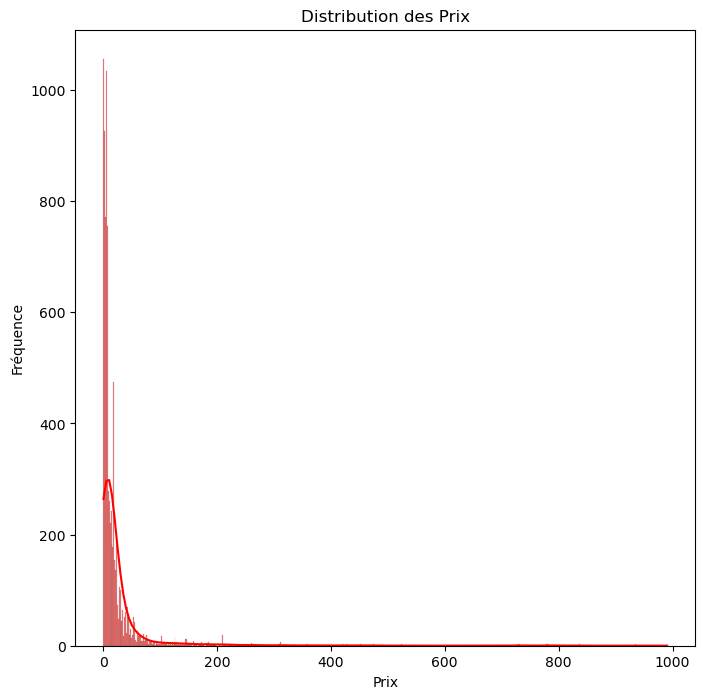

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.histplot(df_medicaments['prix'], kde=True, color='red')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


Les modèles statistiques, y compris les modèles de régression, supposent souvent une variance constante des résidus (homoscédasticité). En transformant le prix par le logarithme, cela peut contribuer à stabiliser la variance des résidus, ce qui peut **améliorer l'ajustement du modèle**.

In [39]:
# L'ajout de 1 est effectué pour éviter les erreurs lorsque le prix est égal à zéro
df_medicaments['log_prix'] = np.log(df_medicaments['prix'] + 1)



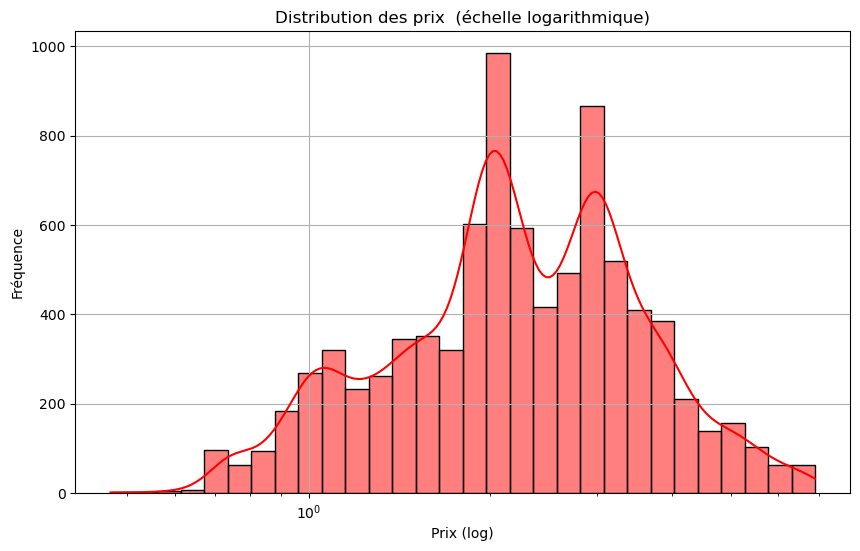

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_medicaments['log_prix'], kde=True, bins=30, log_scale=True,color='red')
plt.title('Distribution des prix  (échelle logarithmique)')
plt.xlabel('Prix (log)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

Pour améliorer les résultats du modèle de prédiction du prix des médicaments, vous pouvez prendre les mesures suivantes :

- **Encodage des variables catégorielles** : Incluez les autres features de type objet en utilisant des méthodes d'encodage telles que le Label Encoding ou le One-Hot Encoding.

- **Sélection des features** : Identifiez les features les plus importantes en utilisant des techniques d'analyse de l'importance des variables, comme celles offertes par des modèles comme Extra Trees.

- **Choix d'un modèle adapté** : Explorez d'autres modèles de régression tels que Random Forest ou Gradient Boosting pour évaluer si l'un d'eux présente de meilleures performances. Vous pouvez ajuster les hyperparamètres pour optimiser les résultats.

- **Optimisation des hyperparamètres** : Utilisez des techniques d'optimisation d'hyperparamètres, comme la recherche par grille, pour trouver les meilleurs paramètres pour le modèle sélectionné.

- **Gestion des valeurs aberrantes et manquantes** : Assurez-vous de traiter correctement les valeurs aberrantes et les valeurs manquantes, car elles peuvent influencer significativement les performances du modèle.

### Les attributs  à encoder : "forme pharma", "voies admin" et "substances" :

Les colonnes sélectionnées pour l'entraînement du modèle comprennent :

1. **substances_encoded :** Cette caractéristique représente les substances actives des médicaments, encodées pour être utilisées dans le modèle. Elle offre une vue consolidée des composants clés des médicaments.

2. **log_prix ( TARGET) :** Il s'agit du logarithme des prix des médicaments, ce qui permet de transformer l'échelle des valeurs. Cette transformation peut rendre la relation entre le prix et les autres caractéristiques plus linéaire, facilitant ainsi la modélisation.

3. **tx rembours :** Cette caractéristique indique le taux de remboursement du médicament. Elle peut influencer le prix final du médicament et est importante pour comprendre la couverture d'assurance.

4. **nb_comprime :** Représentant le nombre de comprimés dans une boîte, cette caractéristique offre des informations sur la quantité de médicament fournie dans un emballage standard.

5. **nb_plaquette :** Il s'agit du nombre de plaquettes de médicaments contenues dans l'emballage. Cette caractéristique donne une indication sur la forme de distribution du médicament.

6. **voies admin_encoded :** Cette caractéristique encode les différentes voies d'administration des médicaments. Elle renseigne sur la manière dont le médicament est censé être pris, par exemple, par voie orale, intraveineuse, etc.

7. **forme pharma_encoded :** Encodant la forme pharmaceutique des médicaments, cette caractéristique décrit la présentation physique du médicament, telle que comprimés pelliculés, gélules, etc. Elle peut influencer la facilité d'utilisation et la biodisponibilité.

Ces caractéristiques ont été soigneusement sélectionnées en fonction de leur pertinence potentielle pour prédire le prix des médicaments, et elles offrent une représentation diversifiée des aspects clés des produits pharmaceutiques.

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Charger le DataFrame initial
df_medicaments = pd.read_csv("data/boites_medicaments.csv", delimiter=';')

# Sélectionner les colonnes spécifiques
selected_columns = ['nb_comprime', 'nb_plaquette']

# Créer une nouvelle DataFrame avec les colonnes sélectionnées
df_medicaments_new = df_medicaments[selected_columns].copy()

# Convertir les valeurs de 'taux de remboursements' en nombre réel (float)
df_medicaments_new['tx rembours'] = df_medicaments['tx rembours'].str.rstrip('%').astype('float') / 100.0



# Liste des colonnes à encoder
colonnes_a_encoder = ["forme pharma", "voies admin"]

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le label encoding à chaque colonne
for colonne in colonnes_a_encoder:
    if colonne in df_medicaments.columns:
        df_medicaments[colonne + '_encoded'] = label_encoder.fit_transform(df_medicaments[colonne])

# Copier les colonnes encodées dans la nouvelle DataFrame
df_medicaments_new['forme pharma_encoded'] = df_medicaments['forme pharma_encoded']
df_medicaments_new['voies admin_encoded'] = df_medicaments['voies admin_encoded']

# Encoder la colonne 'substances' et copier dans la nouvelle DataFrame
df_medicaments['substances_encoded'] = le.fit_transform(list(df_medicaments.substances.values))
df_medicaments_new['substances_encoded'] = df_medicaments['substances_encoded']


# Appliquer le logarithme sur les prix pour créer une nouvelle colonne 'log_prix'
df_medicaments_new['log_prix'] = np.log(df_medicaments['prix'] + 1)

# Afficher le premier enregistrement de la nouvelle DataFrame
df_medicaments_new


,nb_comprime,nb_plaquette,tx rembours,forme pharma_encoded,voies admin_encoded,substances_encoded,log_prix
0,28,3,0.65,30,64,683,1.342865
1,28,0,0.65,49,64,1103,2.727853
2,0,0,0.65,78,64,382,1.896119
3,0,0,0.65,74,64,38,3.229618
4,30,0,1.00,30,64,1024,4.109890
...,...,...,...,...,...,...,...
8559,28,0,0.65,25,64,1200,3.795489
8560,0,0,0.65,153,68,926,6.662328
8561,14,0,0.65,24,64,1238,1.597365
8562,90,0,0.65,38,64,179,2.721953


## L'entraînement avec le modèle ExtraTreesRegressor







ExtraTreesRegressor est un modèle de régression basé sur des arbres de décision qui appartient à la famille des méthodes ensemblistes. L'idée centrale derrière ExtraTreesRegressor est de construire un ensemble diversifié d'arbres de décision pour améliorer la robustesse du modèle et fournir des prédictions précises.

In [42]:
# Import des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import make_scorer
import numpy as np

# Sélection des variables indépendantes (X) et dépendante (Y)
X = df_medicaments_new.drop(columns=['log_prix'])  # Variables indépendantes
Y = df_medicaments_new['log_prix']  # Variable dépendante (ce que vous voulez prédire)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialisation du modèle Extra Trees
extra_trees_model = ExtraTreesRegressor()

# Entraînement du modèle Extra Trees sur l'ensemble d'entraînement
extra_trees_model.fit(X_train, Y_train)

# Prédictions avec le modèle Extra Trees sur l'ensemble de test
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Calcul du MAPE pour le modèle Extra Trees sur l'ensemble de test
mape_extra_trees = mape_error(Y_test, y_pred_extra_trees)

# Utilisation de la validation croisée pour obtenir des scores MAPE sur plusieurs plis
cv_scores = cross_val_score(extra_trees_model, X, Y, cv=5, scoring=make_scorer(mape_error))

# Affichage des résultats
print(f"MAPE Extra Trees sur l'ensemble de test : {mape_extra_trees:.2f}%")
print(f"MAPE Extra Trees avec validation croisée (moyenne) : {np.mean(cv_scores):.2f}%")


MAPE Extra Trees sur l'ensemble de test : 15.68%
MAPE Extra Trees avec validation croisée (moyenne) : 15.51%


### Évaluation de la Performance du Modèle Extra Trees : MAPE sur l'Ensemble de Test et Validation Croisée

L'erreur relative moyenne absolue (MAPE) pour le modèle **Extra Trees** sur l'ensemble de test est de **15.68%**, ce qui indique que le modèle, en moyenne, prédit les valeurs de manière assez précise par rapport aux valeurs réelles. De plus, la MAPE avec validation croisée (moyenne) est de **15.59%**, suggérant une cohérence dans la performance du modèle sur différents plis du jeu de données.

Ces résultats suggèrent que le modèle Extra Trees semble bien généraliser et maintenir une précision relativement constante sur des données inconnues, ce qui est un aspect positif de sa capacité prédictive. Cependant, il est toujours essentiel de prendre en compte d'autres métriques et de poursuivre l'exploration pour garantir une évaluation complète de la performance du modèle

In [43]:
# Import de la métrique R2
from sklearn.metrics import r2_score

# Calcul du R2 score pour le modèle Extra Trees
r2_extra_trees = r2_score(Y_test, y_pred_extra_trees)

# Utilisation de la validation croisée pour obtenir des scores R2 sur plusieurs plis
cv_r2_extra_trees = cross_val_score(extra_trees_model, X, Y, cv=5, scoring='r2')

# Affichage des résultats
print(f"R2 Extra Trees sur l'ensemble de test : {r2_extra_trees:.2f}")
print(f"R2 Extra Trees avec validation croisée (moyenne) : {np.mean(cv_r2_extra_trees):.2f}")


R2 Extra Trees sur l'ensemble de test : 0.71
R2 Extra Trees avec validation croisée (moyenne) : 0.74


### Évaluation de la Performance du Modèle Extra Trees : R2 sur l'Ensemble de Test et Validation Croisée

Les résultats de l'évaluation de la performance du modèle Extra Trees sont prometteurs. Sur l'ensemble de test, le coefficient de détermination (R2) atteint **0.71**, indiquant une bonne capacité du modèle à expliquer la variance des données. De plus, la validation croisée, qui consiste à évaluer le modèle sur plusieurs plis du jeu de données, confirme cette performance avec une moyenne de **0.74** pour le R2. Ces résultats suggèrent que le modèle Extra Trees a la capacité de généraliser ses prédictions au-delà du jeu de test initial, ce qui est une indication positive de sa robustesse.

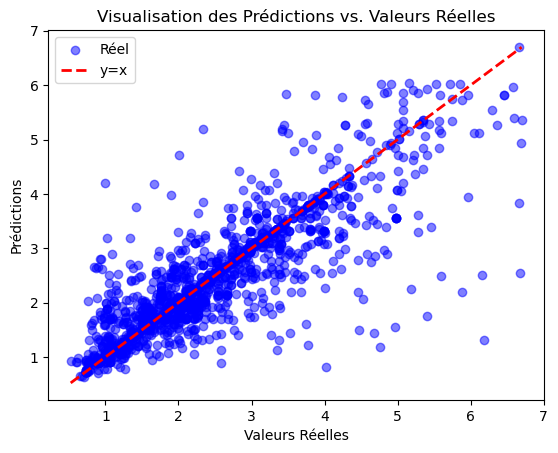

In [44]:
import matplotlib.pyplot as plt

# Scatter plot des valeurs réelles par rapport aux prédictions
plt.scatter(Y_test, y_pred_extra_trees, alpha=0.5, c='blue', label='Réel')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='y=x')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Visualisation des Prédictions vs. Valeurs Réelles')
plt.legend()
plt.show()
